# Bayesian Optimization Example Using `mlos_core`

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [41]:
# Define a fake "performance" function.
# In an actual application, we would not have access to this function directly.
# Instead, we could only measure the outcome by running an experiment, such as timing
# a particular run of the system.
def f(x):
    return (6*x-2)**2*np.sin(12*x-4)

Text(0, 0.5, 'Objective (i.e. performance)')

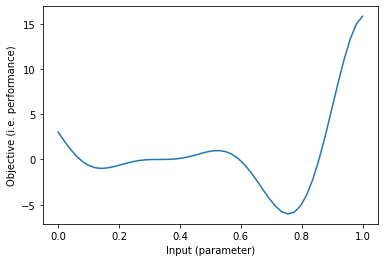

In [42]:
# define a domain to evaluate
line = np.linspace(0, 1)
# evaluate the function
values = f(line)
# plot the function
plt.plot(line, values)
plt.xlabel("Input (parameter)")
plt.ylabel("Objective (i.e. performance)")

In [43]:
import ConfigSpace as CS

# Start defining a ConfigurationSpace for the Optimizer to search.
input_space = CS.ConfigurationSpace(seed=1234)

# Add a single continuous input dimension between 0 and 1.
input_space.add_hyperparameter(CS.UniformFloatHyperparameter(name='x', lower=0, upper=1))

x, Type: UniformFloat, Range: [0.0, 1.0], Default: 0.5

In [44]:
import mlos_core

In [45]:
# Choose an optimizer.

#optimizer = mlos_core.optimizers.RandomOptimizer(parameter_space=input_space)

# optimizer = mlos_core.optimizers.FlamlOptimizer(parameter_space=input_space)

# optimizer = mlos_core.optimizers.SmacOptimizer(parameter_space=input_space)

optimizer = mlos_core.optimizers.EmukitOptimizer(parameter_space=input_space)

In [46]:
# Inspect the chosen optimizer
optimizer

EmukitOptimizer(parameter_space=Configuration space object:
  Hyperparameters:
    x, Type: UniformFloat, Range: [0.0, 1.0], Default: 0.5
)

Now, we can run the actual optimization which will carry out the steps outlined above.

In [47]:
def run_optimization(optimizer):
    # get a new config value suggestion to try from the optimizer.
    suggested_value = optimizer.suggest()
    # suggested value are dictionary-like, keys are input space parameter names
    # evaluate target function
    target_value = f(suggested_value['x'])
    print(suggested_value, "\n", target_value)
    optimizer.register(suggested_value, target_value)

# run for some iterations
n_iterations = 15
for i in range(n_iterations):
    run_optimization(optimizer)

          x
0  0.749606 
 0   -5.990244
Name: x, dtype: float64
         x
0  0.85683 
 0   -0.01203
Name: x, dtype: float64
          x
0  0.399354 
 0    0.111714
Name: x, dtype: float64
          x
0  0.931236 
 0    10.013951
Name: x, dtype: float64
          x
0  0.304241 
 0   -0.010422
Name: x, dtype: float64
          x
0  0.763036 
 0   -6.002567
Name: x, dtype: float64
          x
0  0.161687 
 0   -0.936365
Name: x, dtype: float64
          x
0  0.402348 
 0    0.126318
Name: x, dtype: float64
          x
0  0.137106 
 0   -0.981619
Name: x, dtype: float64
          x
0  0.308416 
 0   -0.006584
Name: x, dtype: float64
          x
0  0.651748 
 0   -2.293312
Name: x, dtype: float64
     x
0  0.0 
 0    3.02721
Name: x, dtype: float64
          x
0  0.757222 
 0   -6.02074
Name: x, dtype: float64
          x
0  0.757268 
 0   -6.02074
Name: x, dtype: float64
          x
0  0.757265 
 0   -6.02074
Name: x, dtype: float64


After 15 iterations, the model is likely to have captured the general shape, but probably not have found the actual optimum:

In [48]:
optimizer.get_observations()

,x,score
0,0.749606,-5.990244
0,0.856830,-0.012030
0,0.399354,0.111714
0,0.931236,10.013951
0,0.304241,-0.010422
0,0.763036,-6.002567
0,0.161687,-0.936365
0,0.402348,0.126318
0,0.137106,-0.981619
0,0.308416,-0.006584


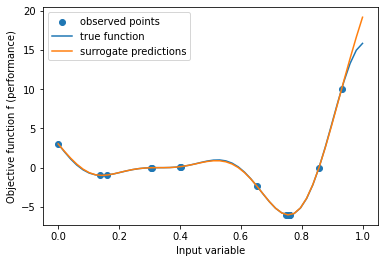

In [49]:
# evaluate the surrogate function
#
surrogate_predictions = optimizer.surrogate_predict(line.reshape(-1, 1))

# plot the observations
#
observations = optimizer.get_observations()
plt.scatter(observations.x, observations.score, label='observed points')

# plot the true function (usually unknown)
#
plt.plot(line, values, label='true function')

# plot the surrogate
#
# alpha = optimizer_config.experiment_designer_config.confidence_bound_utility_function_config.alpha
# t_values = t.ppf(1 - alpha / 2.0, surrogate_predictions['predicted_value_degrees_of_freedom'])
# ci_radii = t_values * np.sqrt(surrogate_predictions['predicted_value_variance'])
# value = surrogate_predictions['predicted_value']
plt.plot(line, surrogate_predictions, label='surrogate predictions')
#plt.fill_between(line, value - ci_radii, value + ci_radii, alpha=.1)
#plt.plot(line, -optimizer.experiment_designer.utility_function(optimization_problem.construct_feature_dataframe(pd.DataFrame({'x': line}))), ':', label='utility_function')
plt.ylabel("Objective function f (performance)")
plt.xlabel("Input variable")
plt.legend()
plt.show()

We can find the best value according to the current surrogate with the ``optimum`` method:

In [50]:
optimizer.get_best_observation()

,x,score
0,0.757265,-6.02074


We can run more iterations to improve the surrogate model and the optimum that is found:

In [51]:
# run for more iterations
n_iterations = 50
for i in range(n_iterations):
    run_optimization(optimizer)

          x
0  0.757268 
 0   -6.02074
Name: x, dtype: float64
          x
0  0.757279 
 0   -6.02074
Name: x, dtype: float64
          x
0  0.757249 
 0   -6.02074
Name: x, dtype: float64
          x
0  0.757263 
 0   -6.02074
Name: x, dtype: float64
          x
0  0.757251 
 0   -6.02074
Name: x, dtype: float64
          x
0  0.757199 
 0   -6.020739
Name: x, dtype: float64
          x
0  0.756909 
 0   -6.020678
Name: x, dtype: float64
          x
0  0.757341 
 0   -6.020735
Name: x, dtype: float64
          x
0  0.757308 
 0   -6.020738
Name: x, dtype: float64
          x
0  0.757588 
 0   -6.020679
Name: x, dtype: float64
          x
0  0.757245 
 0   -6.02074
Name: x, dtype: float64
         x
0  0.75723 
 0   -6.02074
Name: x, dtype: float64
          x
0  0.757232 
 0   -6.02074
Name: x, dtype: float64
          x
0  0.757198 
 0   -6.020739
Name: x, dtype: float64
          x
0  0.757247 
 0   -6.02074
Name: x, dtype: float64
          x
0  0.756861 
 0   -6.02066
Name: x, dty

 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


          x
0  0.757255 
 0   -6.02074
Name: x, dtype: float64
          x
0  0.756916 
 0   -6.020681
Name: x, dtype: float64


 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


          x
0  0.757262 
 0   -6.02074
Name: x, dtype: float64


 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


          x
0  0.757289 
 0   -6.020739
Name: x, dtype: float64
          x
0  0.758055 
 0   -6.020392
Name: x, dtype: float64
          x
0  0.758255 
 0   -6.020198
Name: x, dtype: float64


 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


          x
0  0.756999 
 0   -6.020707
Name: x, dtype: float64
          x
0  0.756967 
 0   -6.020698
Name: x, dtype: float64
          x
0  0.756791 
 0   -6.020629
Name: x, dtype: float64


 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


          x
0  0.757265 
 0   -6.02074
Name: x, dtype: float64
          x
0  0.757843 
 0   -6.020551
Name: x, dtype: float64


 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


          x
0  0.757404 
 0   -6.020727
Name: x, dtype: float64
          x
0  0.757109 
 0   -6.02073
Name: x, dtype: float64


 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


         x
0  0.75725 
 0   -6.02074
Name: x, dtype: float64
         x
0  0.75664 
 0   -6.020543
Name: x, dtype: float64
          x
0  0.757261 
 0   -6.02074
Name: x, dtype: float64
          x
0  0.758124 
 0   -6.02033
Name: x, dtype: float64


 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


          x
0  0.757954 
 0   -6.020474
Name: x, dtype: float64
          x
0  0.757142 
 0   -6.020734
Name: x, dtype: float64


 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


         x
0  0.75725 
 0   -6.02074
Name: x, dtype: float64
          x
0  0.756811 
 0   -6.020638
Name: x, dtype: float64
          x
0  0.756975 
 0   -6.0207
Name: x, dtype: float64


 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


          x
0  0.757143 
 0   -6.020734
Name: x, dtype: float64
          x
0  0.756874 
 0   -6.020665
Name: x, dtype: float64


 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


          x
0  0.756967 
 0   -6.020698
Name: x, dtype: float64


 /home/bpkroth/.conda/envs/mlos_core/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


There is some improvement in the optimum:

In [52]:
optimizer.get_best_observation()

,x,score
0,0.757249,-6.02074


We can now visualize the surrogate model and optimization process again. The points are colored according to the iteration number, with dark blue points being early in the process and yellow points being later. You can see that at the end of the optimization, the points start to cluster around the optimum.

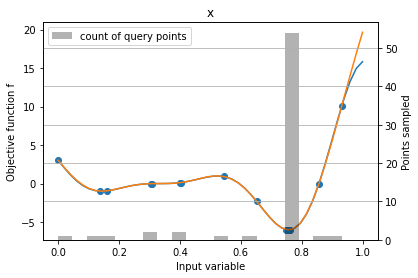

In [53]:
# evaluate the surrogate function
#
surrogate_predictions = optimizer.surrogate_predict(line.reshape(-1, 1))

# plot the observations
#
observations = optimizer.get_observations()
plt.scatter(observations.x, observations.score, label='observed points')

# plot true function (usually unknown)
#
plt.plot(line, values, label='true function')

# plot the surrogate
#
#ci_raduii = surrogate_predictions['prediction_ci']
plt.plot(line, surrogate_predictions, label='surrogate predictions')
#plt.fill_between(line, value - ci_radii, value + ci_radii, alpha=.1)
#plt.plot(line, -optimizer.utility_function(pd.DataFrame({'x': line})), ':', label='utility_function')

ax = plt.gca()
ax.set_ylabel("Objective function f")
ax.set_xlabel("Input variable")
bins_axes = ax.twinx()
bins_axes.set_ylabel("Points sampled")
pd.DataFrame(observations.x).hist(bins=20, ax=bins_axes, alpha=.3, color='k', label="count of query points")
plt.legend()